In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
! kaggle datasets download -d carrie1/ecommerce-data -p "D:\classification_algo"

Dataset URL: https://www.kaggle.com/datasets/carrie1/ecommerce-data
License(s): unknown




  0%|          | 0.00/7.20M [00:00<?, ?B/s]
100%|██████████| 7.20M/7.20M [00:00<00:00, 1.54GB/s]


In [5]:
import os.path as b

path = b.abspath('ecommerce-data.zip')

from zipfile import ZipFile

with ZipFile(path, 'r') as z:
    z.extractall()
    print('file extracted')

file extracted


In [4]:
# data_path = b.abspath('data.csv')

ecommerce_data = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [5]:
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
ecommerce_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [8]:
ecommerce_data.describe(exclude = ['float64', 'int64']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [9]:
ecommerce_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
ecommerce_data.shape

(541909, 8)

In [11]:
ecommerce_data.dropna(inplace = True)

In [12]:
ecommerce_data.shape

(406829, 8)

In [13]:
ecommerce_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
ecommerce_data[ecommerce_data['Quantity'] < 0]['Quantity']

141       -1
154       -1
235      -12
236      -24
237      -24
          ..
540449   -11
541541    -1
541715    -5
541716    -1
541717    -5
Name: Quantity, Length: 8905, dtype: int64

In [18]:
ecommerce_data[ecommerce_data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [20]:
ecommerce_data.drop(ecommerce_data[ecommerce_data['Quantity'] < 0].index, inplace = True)

In [21]:
ecommerce_data.shape

(397924, 8)

In [126]:
ecommerce_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
InvoiceDate         0
CustomerID     135080
Country             0
quantity        10624
unit_price       2517
dtype: int64

In [127]:
ecommerce_data.drop(columns = ['CustomerID'], axis = 1, inplace = True)

In [23]:
ecommerce_data['sales'] = ecommerce_data['Quantity'] * ecommerce_data['UnitPrice']

new_data = ecommerce_data.groupby('CustomerID')['sales'].sum().reset_index()
new_data

,CustomerID,sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [24]:
type(new_data)

pandas.core.frame.DataFrame

In [27]:
num_trans = ecommerce_data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [28]:
ecommerce_data['InvoiceDate'] = pd.to_datetime(ecommerce_data['InvoiceDate'])

ecommerce_data['last_transaction'] = (ecommerce_data['InvoiceDate'].max() - ecommerce_data['InvoiceDate']).dt.days



In [29]:
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,sales,last_transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,373


In [30]:
lt = ecommerce_data.groupby(['CustomerID', 'Country'])['last_transaction'].max().reset_index()

In [31]:
lt

,CustomerID,Country,last_transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


In [32]:
merge_table = pd.merge(lt, num_trans, how = 'inner', on = 'CustomerID')

new_df = pd.merge(merge_table, new_data, how = 'inner', on = 'CustomerID')

new_df

,CustomerID,Country,last_transaction,InvoiceNo,sales
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


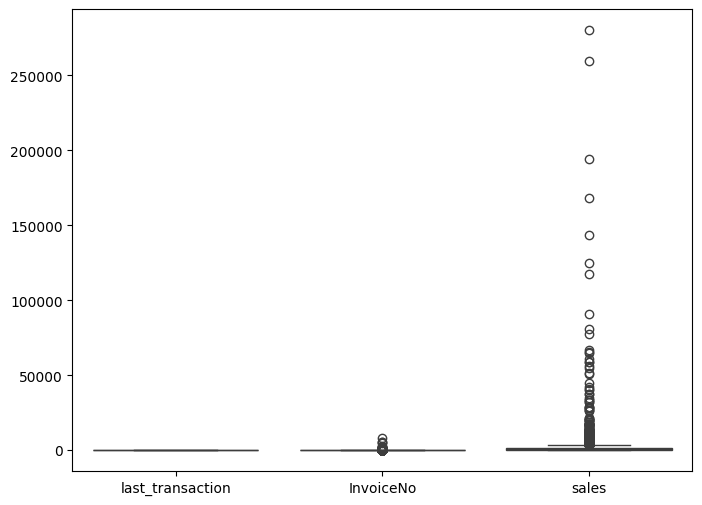

In [35]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = new_df[['last_transaction', 'InvoiceNo', 'sales']])
plt.show()

In [37]:
IQR = new_df['sales'].quantile(0.75) - new_df['sales'].quantile(0.25)

lower_limit = new_df['sales'].quantile(0.25) - 1.5*IQR
upper_limit = new_df['sales'].quantile(0.75) + 1.5*IQR
new_iqr_df = new_df[(new_df['sales'] < upper_limit) & (new_df['sales'] > lower_limit)]
new_iqr_df.shape

(3923, 5)

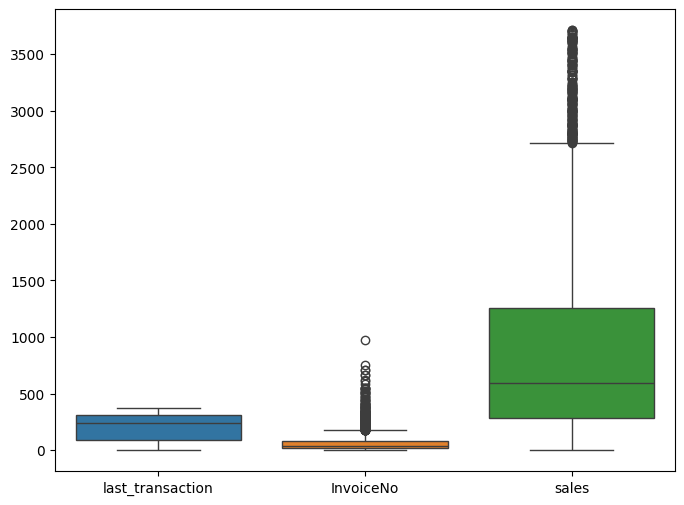

In [38]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = new_iqr_df[['last_transaction', 'InvoiceNo', 'sales']])
plt.show()

In [39]:
new_iqr_df.reset_index(drop = True, inplace= True)
new_iqr_df

,CustomerID,Country,last_transaction,InvoiceNo,sales
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


<Axes: >

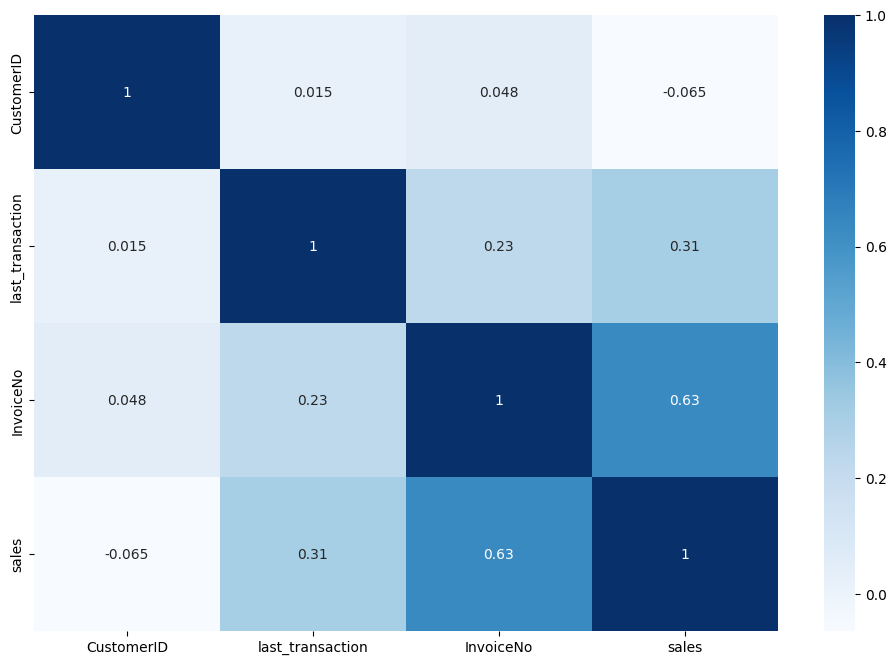

In [49]:
correlation = new_iqr_df.select_dtypes(exclude = ['object'])

correlation = correlation.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(data = correlation, cmap = 'Blues', annot = True)

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaling = new_iqr_df.select_dtypes(exclude = ['object'])

data_scaling = data_scaling.drop(columns = ['CustomerID'])

data_scaling

data_scaling = scaler.fit_transform(data_scaling)

In [57]:
data_scaling

array([[0.95710456, 0.03095975, 0.48420026],
       [0.04825737, 0.07430341, 0.47350725],
       [0.82841823, 0.01651187, 0.09009179],
       ...,
       [0.33512064, 0.01135191, 0.04796903],
       [0.90080429, 0.77915377, 0.56438842],
       [0.53887399, 0.07120743, 0.49498757]], shape=(3923, 3))

In [ ]:
copy_df = new_iqr_df
copy_df.drop(columns = ['CustomerID'], inplace = True)



C:\Users\User\AppData\Local\Temp\ipykernel_30444\4213259948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df.drop(columns = ['CustomerID'], inplace = True)


,Country,last_transaction,InvoiceNo,sales
0,Finland,357,31,1797.24
1,Italy,18,73,1757.55
2,Norway,309,17,334.40
3,Norway,296,85,2506.04
4,Bahrain,203,4,89.00
...,...,...,...,...
3918,United Kingdom,277,10,180.60
3919,United Kingdom,180,7,80.82
3920,United Kingdom,125,12,178.05
3921,United Kingdom,336,756,2094.88


In [62]:
data_scaling = pd.DataFrame(data_scaling) 

last_version = copy_df.select_dtypes(exclude = ['object'])

data_scaling.columns = last_version.columns

In [64]:
data_scaling['Country'] = copy_df['Country']

In [65]:
data_scaling

,last_transaction,InvoiceNo,sales,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


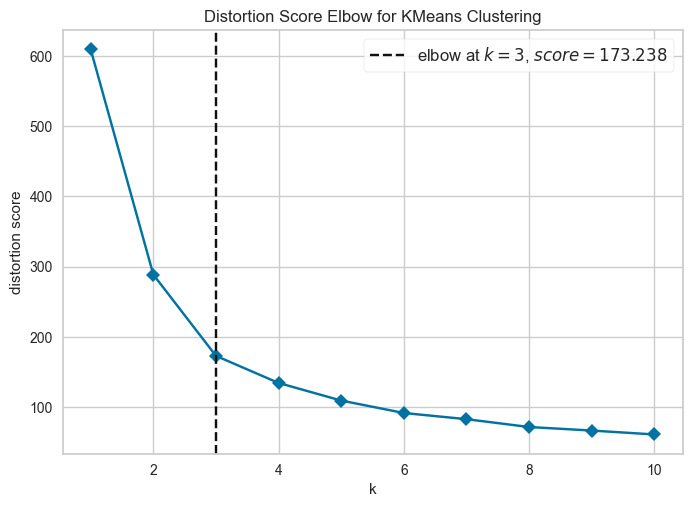

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 11), timings = False)
visualizer.fit(data_scaling)
visualizer.show()

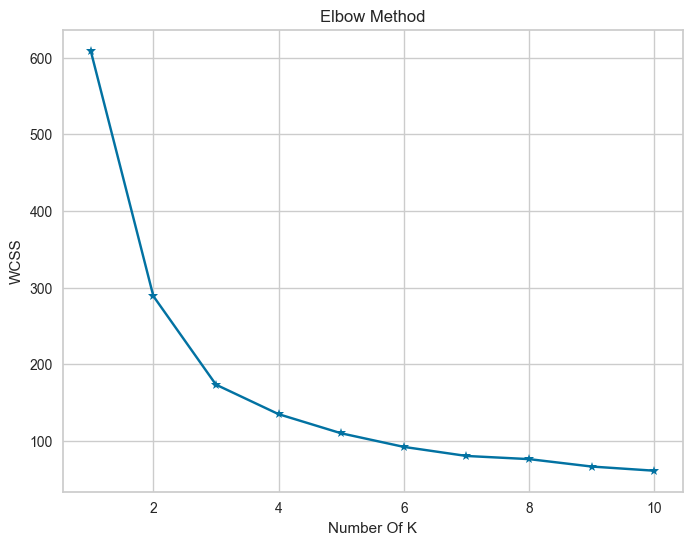

In [70]:
WCSS = []

for k in range(1, 11):
    
    k_means = KMeans(n_clusters = k, init = 'k-means++', random_state = 2)
    k_means.fit_predict(data_scaling)
    WCSS.append(k_means.inertia_)

plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), WCSS, marker = '*')
plt.xlabel('Number Of K')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [71]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 2)

y = km.fit_predict(data_scaling)
data_scaling['cluster'] = y
data_scaling

,last_transaction,InvoiceNo,sales,cluster
0,0.957105,0.030960,0.484200,2
1,0.048257,0.074303,0.473507,0
2,0.828418,0.016512,0.090092,1
3,0.793566,0.086687,0.675160,2
4,0.544236,0.003096,0.023978,1
...,...,...,...,...
3918,0.742627,0.009288,0.048656,1
3919,0.482574,0.006192,0.021774,0
3920,0.335121,0.011352,0.047969,0
3921,0.900804,0.779154,0.564388,2


In [74]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data_scaling, km.labels_, metric = 'euclidean'))

0.7738290826736299


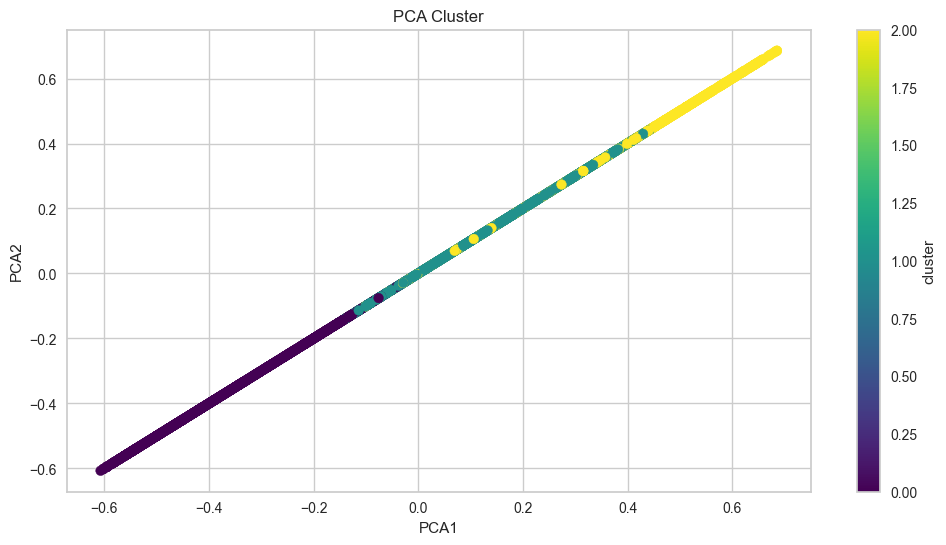

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

reduced_data = pca.fit_transform(data_scaling[['last_transaction', 'InvoiceNo', 'sales']])

plt.figure(figsize = (12, 6))
plt.scatter(reduced_data[:, 0],  reduced_data[:, 0], c = data_scaling['cluster'], cmap = 'viridis')
plt.title('PCA Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label = 'cluster')
plt.show()

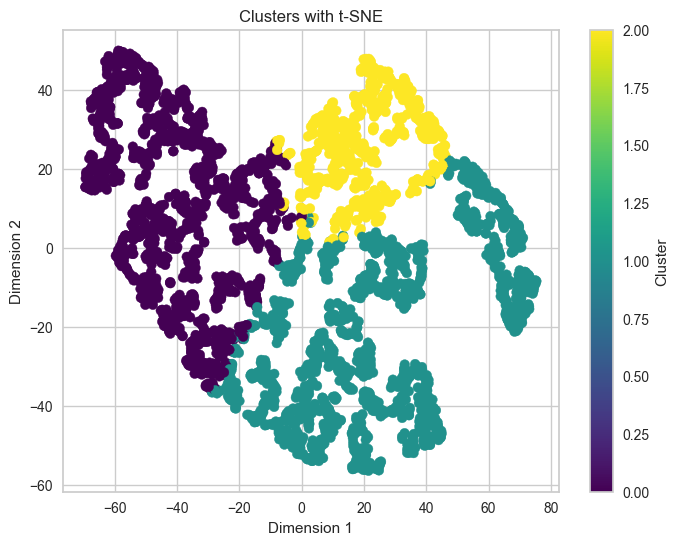

In [76]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(data_scaling[['last_transaction', 'InvoiceNo', 'sales']])

plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=data_scaling['cluster'], cmap='viridis')
plt.title("Clusters with t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label='Cluster')
plt.show()
